### Описание задач и целей

#### **Задача**:

В данной задаче я буду повторять задачу, которую реализовывал во время обучения в МФТИ, но уже с несколько иным подходом =)

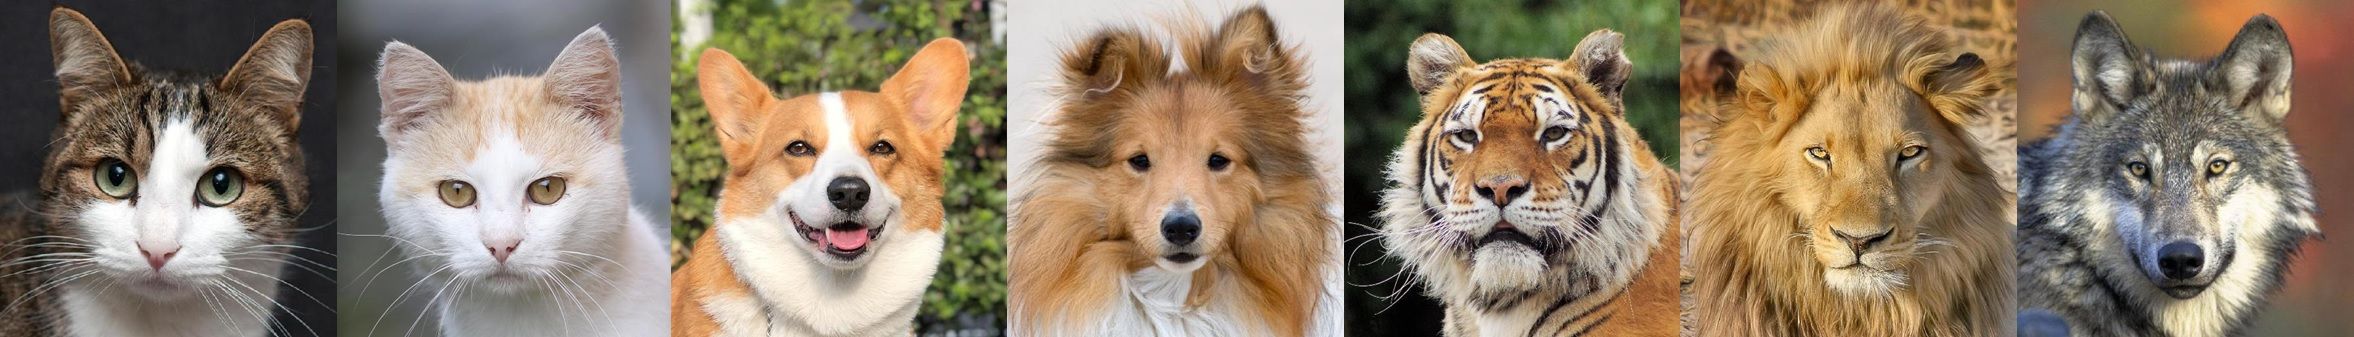
---

#### **Цели:**

Цели, которых хочу достичь при реализации задачи в данном ноутбуке:
- Более глубокое понимание задачи классификации с использованием VGG и ResNet;
- Структурировать свои знания по этим сетям;
- Повторить реализацию загрузчика изображений;
- Обучить собственную CNN
- Применить обученную VGG
- Применить обученную ResNet
- Провести эксперименты с дообучением VGG и ResNet
- Попробовать применить, например Yolo или иную CNN для CV

---

#### **Данные:**
[Информация о данных](https://www.kaggle.com/datasets/andrewmvd/animal-faces?resource=download)

Этот набор данных, также известный, как Animal Faces-HQ (AFHQ), состоит из 16 130 высококачественных изображений с разрешением 512х512.

В наборе три основных класса, каждый из которых содержит около 5000 изображений.

Классы:
- Кошки
- Собаки
- Дикие животные

### Необходимые установки в новое виртуальное пространство=)

In [1]:
# pip install numpy

  Using cached numpy-2.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
#!pip3 install torch torchvision torchaudio

  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x8

In [6]:
# pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (165 kB)
Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 17.2 MB/s eta 0:00:00
Note: yo

In [56]:
# pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 443.3 kB/s eta 0:00:001m428.0 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.4 MB/s eta 0:00:008 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Импорты

In [1]:
# Стандартные загрузки для работы с папками и данными
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Для создания собственного класса загрузчика
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision.transforms import v2
from torchvision import transforms, datasets
import torchvision.models as models

import torch
import torch.nn as nn

import time
import json
from tqdm import tqdm

### Исследование данных

In [2]:
# # датасет скачал на локальную машину. поэтому его необходимо разархивировать для начала
# # Путь к архиву
# zip_path = "/media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data/archive.zip"

# # Путь, куда нужно разархивировать файлы
# extract_path = "/media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data"

# # Создайте папку для разархивирования, если её не существует
# # os.makedirs(extract_path, exist_ok=True)

# # Открытие и разархивирование
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("Архив успешно разархивирован в:", extract_path)

Архив успешно разархивирован в: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data


Теперь необходимо рассмотреть данные более детально, понять структуру папок, чтобы успешно подгрузить данные =)

In [2]:
os.listdir('./data')

['afhq', 'archive.zip']

In [4]:
# датасет в папке: afhq, поэтому зададим путь к ней
data_path = './data/afhq'

In [5]:
os.listdir(data_path)

['train', 'val']

#### Повторение кода для лучшего понимания и считывания файлов в папках

По сути здесь простые циклы для переборов файлов в папках, но полностью самостоятельно я этого никогда не реализовывал.

Всегда куда то подглядывал и подсматривал, пора сделать это самомстоятельно "ОТ" и "ДО"!

In [49]:
# первый шажок, просмотр того, что есть в основной папке с данными
for _ in os.listdir(data_path):
    print(_)

train
val


Теперь необходимо поочередно углубиться в каждую из папок train и val и посмотреть, что есть внутри них

In [45]:
print(f'Содержимое папки: {os.listdir(data_path)}')

Содержимое папки: ['train', 'val']


In [55]:
for _ in os.listdir(data_path):
    print(f'Содержимое папки {_} : {os.listdir(data_path + '/' + _)}')

Содержимое папки train : ['cat', 'dog', 'wild']
Содержимое папки val : ['cat', 'dog', 'wild']


Поскольку внутри каждой из данных папко лежит n-ое кол-во изображений, хотелось бы узнать это количество для каждой из папок Трейновой и валидационной частей.

Простейший способ это сделать - получить длину списка содержимого каждой из этих папок =)

In [7]:
print('Структура данных')
print()
print('Папка afhq содержит:')
for _ in os.listdir(data_path):
    print(f'    - Папка {_} содержит:')
    for label in os.listdir(data_path + '/' + _):
        print(f'        - Папка {label} содержит: {len(os.listdir(data_path + '/' + _ + '/' + label))} файла/ов с изображениями')

Структура данных

Папка afhq содержит:
    - Папка train содержит:
        - Папка cat содержит: 5153 файла/ов с изображениями
        - Папка dog содержит: 4739 файла/ов с изображениями
        - Папка wild содержит: 4738 файла/ов с изображениями
    - Папка val содержит:
        - Папка cat содержит: 500 файла/ов с изображениями
        - Папка dog содержит: 500 файла/ов с изображениями
        - Папка wild содержит: 500 файла/ов с изображениями


In [88]:
# разумеется есть более лаконичный метод для работы с данными
# надо будет приспособить данный метод под мой, чтобы более красиво все выглядело)
for path, dir_list, file_list in os.walk('./data/afhq'):
  print(f'Путь к папке - {path}')
  print(f'  -- кол-во папок {len(dir_list)}')
  print(f'  -- кол-во файлов {len(file_list)}')

Путь к папке - ./data/afhq
  -- кол-во папок 2
  -- кол-во файлов 0
Путь к папке - ./data/afhq/train
  -- кол-во папок 3
  -- кол-во файлов 0
Путь к папке - ./data/afhq/train/cat
  -- кол-во папок 0
  -- кол-во файлов 5153
Путь к папке - ./data/afhq/train/dog
  -- кол-во папок 0
  -- кол-во файлов 4739
Путь к папке - ./data/afhq/train/wild
  -- кол-во папок 0
  -- кол-во файлов 4738
Путь к папке - ./data/afhq/val
  -- кол-во папок 3
  -- кол-во файлов 0
Путь к папке - ./data/afhq/val/cat
  -- кол-во папок 0
  -- кол-во файлов 500
Путь к папке - ./data/afhq/val/dog
  -- кол-во папок 0
  -- кол-во файлов 500
Путь к папке - ./data/afhq/val/wild
  -- кол-во папок 0
  -- кол-во файлов 500


Взглянем на парочку изображений

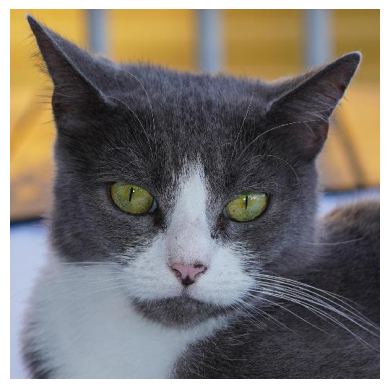

In [83]:
img = (Image.open('./data/afhq/train/cat/flickr_cat_000004.jpg'))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

### Пользовательский загрузчик данных

In [2]:
# данный класс здесь помещен для удобства инициализации в случае перезагрузки ноутбуков
class EarlyStopping:
    def __init__(self, mode='min', patience=10, threshold=0.0001, threshold_mode='rel'):
        # проверка на правильность переданных параметров
        if mode not in {'min', 'max'}:
            raise ValueError(f'Параметр mode может принимать только значения max и min.')
        if threshold_mode not in {'rel', 'abs'}:
            raise ValueError(f'Параметр threshold_mode может принимать только значения rel и abs.')
        if not isinstance(patience, int):
            raise TypeError(f'Параметр patience должен быть целым числом.')
        if not isinstance(threshold, float):
            raise TypeError(f'Параметр threshold должен быть float и меньше 1.0.')
        if threshold >= 1.0:
            raise ValueError(f'Параметр threshold должен быть меньше 1.0.')

        self.mode = mode
        self.patience = patience
        self.threshold = threshold
        self.threshold_mode = threshold_mode
        self.count = 0
        self.best = None

    def __call__(self, tracked_parameter):
        current = float(tracked_parameter)
        if self.best is None:
            self.best = current
            return False

        if self.changed_better(current, self.best):
            self.best = current
            self.count = 0
        else:
            self.count += 1

        if self.count >= self.patience:
            self.count = 0
            return True
        return False

    def changed_better(self, current, best):
        # Отслеживание потерь для регрессии (min) или точности для классификации (max)
        if self.mode == 'min' and self.threshold_mode == 'rel':
            return current < best - best * self.threshold

        elif self.mode == 'min' and self.threshold_mode == 'abs':
            return current < best - self.threshold

        elif self.mode == 'max' and self.threshold_mode == 'rel':
            return current > best + best * self.threshold

        else:  # mode == 'max' and threshold == 'abs':
            return current > best + self.threshold

In [3]:
class MyDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.len_dataset = 0
        self.data_list = []

        # итерируемся по папке с основными файлами
        for path_dir, dir_list, file_list in os.walk(path):
            if path_dir == path:
                self.classes = sorted(dir_list)
                self.class_to_idx = {
                    cls_name: i for i, cls_name in enumerate(self.classes)
                }
                continue

            cls = path_dir.split('/')[-1]

            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                self.data_list.append((file_path, self.class_to_idx[cls]))

            self.len_dataset += len(file_list)

    def __len__(self):
        return self.len_dataset

    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = Image.open(file_path)

        if self.transform is not None:
            sample = self.transform(sample)

        return sample, target

In [3]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5, ), std=(0.5, ))
    ]
)

In [4]:
# создание датасетов
train_data = MyDataset('./data/afhq/train', transform=transform)
test_data = MyDataset('./data/afhq/val', transform=transform)

In [5]:
train_data, val_data = random_split(train_data, [0.7, 0.3])

In [6]:
# Создание загрузчиков
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [7]:
train_data

In [8]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

10241
4389
1500


In [10]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

161
69
24


In [8]:
sample, target = train_data[1013]
print(train_data[1013])
print(sample.shape)

(Image([[[ 0.3255,  0.2784,  0.2392,  ...,  0.3882,  0.4431,  0.4902],
        [ 0.3333,  0.2706,  0.2392,  ...,  0.3490,  0.3804,  0.4196],
        [ 0.3333,  0.2784,  0.2471,  ...,  0.3098,  0.3490,  0.3725],
        ...,
        [ 0.2078,  0.2235,  0.2314,  ..., -0.4510, -0.3725, -0.3412],
        [ 0.2000,  0.2314,  0.2549,  ..., -0.5216, -0.4353, -0.3882],
        [ 0.1922,  0.2235,  0.2627,  ..., -0.5922, -0.4980, -0.4353]],

       [[ 0.1137,  0.0667,  0.0353,  ...,  0.2000,  0.2784,  0.3255],
        [ 0.0980,  0.0588,  0.0196,  ...,  0.1686,  0.2157,  0.2549],
        [ 0.0902,  0.0431,  0.0118,  ...,  0.1529,  0.1922,  0.2157],
        ...,
        [ 0.0510,  0.0667,  0.0745,  ..., -0.5765, -0.4980, -0.4667],
        [ 0.0431,  0.0745,  0.1059,  ..., -0.6471, -0.5608, -0.5137],
        [ 0.0353,  0.0667,  0.1137,  ..., -0.7176, -0.6235, -0.5608]],

       [[-0.0980, -0.1451, -0.1608,  ..., -0.0196,  0.0510,  0.0980],
        [-0.1059, -0.1529, -0.1686,  ..., -0.0745, -0.0275,

In [12]:
# проверим загрузчики данных
# должны получить что-то вроде (64, 3, H, W) для изображений и (64,) для меток, где 64 — это размер батча.
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 3, 512, 512]) torch.Size([64])


Датасет успешно собран, загрузчик так же создан, на сегодня пока что все, продолжу написание собственной сети уже завтра!)

### Пользовательские CNN

#### Пользовательский класс CNN №1

Т.к. изображения 512х512, то необходимо это учитывать или в модели или же на более ранних этапах по преобразованию данных изображений.

Ранее я этого делать не стал, т.к. хочу более лучше разобраться в написании Сверточной нейронной сети, поэтому буду делать данные преобразования внутри архитектуры Сети.

Вероятно, это не лучший способ, но как я иначе узнаю, что лучше?)

In [3]:
class MyCNN(nn.Module):
    def __init__(self, size_in, size_out):
        super().__init__()
        
        # слой 1 сверточная модель
        self.conv = nn.Sequential(
            nn.Conv2d(size_in, 32, (3,3), bias=False),    # (batch_size, 3, 512, 512) => (batch_size, 32, 510, 510)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),    # (batch_size, 32, 510, 510) => (batch_size, 32, 255, 255)

            
            nn.Conv2d(32, 64, (3,3), bias=False),    # (batch_size, 32, 255, 255) => (batch_size, 64, 253, 253)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)    # (batch_size, 64, 253, 253) => (batch_size, 64, 126, 126)
        )

        # подготовка для линейной модели
        self.flatten = nn.Flatten()    # (batch_size, 64, 126, 126) => (batch_size, 64*126*126)

        # слой 2 - линейная модель
        self.line = nn.Sequential(
            nn.Linear(64*126*126, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, size_out)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        size_out = self.line(x)
        return size_out

In [10]:
model_classification = MyCNN(3, 3)
model_classification

MyCNN(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line): Sequential(
    (0): Linear(in_features=1016064, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [43]:
inp = torch.rand([64, 3, 512, 512], dtype=torch.float32)

out = model_classification(inp)
out.shape

torch.Size([64, 3])

#### Подготовка модели

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
model_classification = MyCNN(3, 3).to(device)
model_classification

MyCNN(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line): Sequential(
    (0): Linear(in_features=1016064, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [12]:
# выбираем функцию потерь и оптимизатор градиентного спуска
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model_classification.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

#### Цикл обучения

In [13]:
# почистим кэш
torch.cuda.empty_cache()

In [15]:
EPOCHS = 5
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None

best_loss = float('inf')  # Инициализируем перед циклом обучения

In [16]:
# Цикл обучения
for epoch in range(EPOCHS):
    start_time = time.time()  # Засекаем время начала тренировки модели

    # 1. Тренировка модели
    model_classification.train()
    running_train_loss = []
    running_train_acc = 0
    train_loop = tqdm(train_loader, leave=False)
    for x, targets in train_loop:
        x, targets = x.to(device), targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model_classification(x)
        loss = loss_model(pred, targets)

        # Обратный проход
        opt.zero_grad()
        loss.backward()
        opt.step()

        running_train_loss.append(loss.item())
        running_train_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        train_loop.set_description(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={sum(running_train_loss)/len(running_train_loss):.4f}")

    # 2. Расчет точности и потерь
    mean_train_loss = torch.mean(torch.tensor(running_train_loss))
    train_acc_epoch = running_train_acc / len(train_data)
    train_loss.append(mean_train_loss)
    train_acc.append(train_acc_epoch)

    # 3. Валидация модели
    model_classification.eval()
    running_val_loss = []
    running_val_acc = 0
    with torch.no_grad():
        for x, targets in val_loader:
            x, targets = x.to(device), targets.to(device)

            pred = model_classification(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            running_val_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        mean_val_loss = torch.mean(torch.tensor(running_val_loss))
        val_acc_epoch = running_val_acc / len(val_data)
        val_loss.append(mean_val_loss)
        val_acc.append(val_acc_epoch)

    # Обновляем lr_scheduler
    lr_scheduler.step(mean_val_loss)
    lr = lr_scheduler.get_last_lr()[0]
    lr_list.append(lr)

    print(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={train_acc_epoch:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_acc_epoch:.4f}, lr={lr:.4f}")

    # Сохранение лучшей модели
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        checkpoint = {
            'state_model': model_classification.state_dict(),
            'state_opt': opt.state_dict(),
            'state_lr_scheduler': lr_scheduler.state_dict(),
            'loss': {'train_loss': train_loss, 'val_loss': val_loss, 'best_loss': best_loss},
            'metric': {'train_acc': train_acc, 'val_acc': val_acc},
            'lr': lr_list,
            'epoch': {'EPOCHS': EPOCHS, 'save_epoch': epoch}
        }
        torch.save(checkpoint, f'model_reg_state_dict_epoch_{epoch+1}.pt')
        print(f"На эпохе: {epoch+1}, сохранена модель со значением функции потерь на валидации: {mean_val_loss:.4f}\n")

    # Early stopping
    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break

    # Время обучения одной эпохи
    epoch_time = time.time() - start_time
    print(f"Время на обучение модели в эпоху {epoch + 1}: {epoch_time:.2f} секунд.")

Epoch [1/5], train_loss=5.4690, train_acc=0.3573, val_loss=1.0970, val_acc=0.3609, lr=0.0010
На эпохе: 1, сохранена модель со значением функции потерь на валидации: 1.0970

Время на обучение модели в эпоху 1: 203.15 секунд.


Epoch [2/5], train_loss=1.0989, train_acc=0.3491, val_loss=1.0973, val_acc=0.3602, lr=0.0010
Время на обучение модели в эпоху 2: 198.34 секунд.


Epoch [3/5], train_loss=1.0982, train_acc=0.3488, val_loss=1.0973, val_acc=0.3602, lr=0.0010
Время на обучение модели в эпоху 3: 201.37 секунд.


Epoch [4/5], train_loss=1.0980, train_acc=0.3490, val_loss=1.0974, val_acc=0.3602, lr=0.0010
Время на обучение модели в эпоху 4: 206.29 секунд.


Epoch [5/5], train_loss=1.0981, train_acc=0.3489, val_loss=1.0973, val_acc=0.3602, lr=0.0010
Время на обучение модели в эпоху 5: 205.91 секунд.


Ну что тут можно сказать.

Очевидно, что тестирование и интерпретацию необходимо пропустить, т.к. подобная свертка просто неспособна захватить все необходимые особенности данных.

Какие вижу на данном этапе возможности для решения этой проблемы:

- Изменить изначальный размер изображений, скажем, сделать их 256х256 или еще меньше 128х128;
- В связи с этим переписать архитектуру сети;
- Увеличить количество сверточных и/или полносвяхных слоев;
- Использовать глобальный или адаптивный pooling, вместо фиксированного Flatten().

Но, этим я займусь уже завтра =)

Сейчас считаю, что самостоятельное переписывание и переосмысление цикла обучения для задачи классификации прошло более менее успешно!)

#### Тестирование

#### Интерпретация результатов

#### Изменение размеров входных изображений

Как я написал выше, необходимо двигаться в двух направлениях:
- Изменять размеры входных данных (снизить размерность изображений, для начала хотя бы в 2 раза)
- Увеличивать количество слоев, попробовать хотя бы сделать аналоги VGG16 с 13 свертками и 3 полносвязными.

In [4]:
# изменил размер изображений, и еще корректно ввел данные для каждого канала, для нормализации
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((128, 128)),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

In [5]:
# создание датасетов
train_data = MyDataset('./data/afhq/train', transform=transform)
test_data = MyDataset('./data/afhq/val', transform=transform)

In [6]:
train_data, val_data = random_split(train_data, [0.7, 0.3])

In [7]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [9]:
sample, target = train_data[1013]
print(train_data[1013])
print(sample.shape)

(Image([[[-0.2456, -0.4306, -0.4904,  ..., -0.1149, -0.6793, -0.3574],
        [-0.1498, -0.3594, -0.4212,  ..., -0.0904, -0.6186, -0.1614],
        [-0.2540, -0.3533, -0.2877,  ..., -0.3272, -0.4570, -0.5479],
        ...,
        [ 0.5261,  0.5846,  0.5361,  ..., -0.6232, -0.6410, -0.6718],
        [ 0.5811,  0.5560,  0.4875,  ..., -0.6375, -0.5766, -0.5445],
        [ 0.5673,  0.5300,  0.4950,  ..., -0.5911, -0.5610, -0.5043]],

       [[-0.0789, -0.1948, -0.2176,  ...,  0.1586, -0.3964, -0.1192],
        [ 0.1003, -0.0895, -0.1765,  ...,  0.2161, -0.3093,  0.1116],
        [ 0.0376, -0.0650, -0.0433,  ...,  0.0157, -0.1359, -0.2256],
        ...,
        [ 0.3979,  0.4421,  0.3708,  ..., -0.3796, -0.4240, -0.5181],
        [ 0.4501,  0.4264,  0.3447,  ..., -0.4116, -0.3524, -0.3609],
        [ 0.4242,  0.4055,  0.3742,  ..., -0.3670, -0.3268, -0.2934]],

       [[-0.7639, -0.8625, -0.8621,  ..., -0.5397, -0.7992, -0.6186],
        [-0.7144, -0.8304, -0.8376,  ..., -0.4984, -0.8503,

Отлично. можно продолжать.
Теперь пересчитаем правильно размерности, на входах и выходах из слоев, и попробуем обучить нашу модель

#### Подготовка к обучению

In [11]:
# поправим класс создания нейронки с учетом изменения поступающих данных
class MyCNN(nn.Module):
    def __init__(self, size_in, size_out):
        super().__init__()
        
        # слой 1 сверточная модель
        self.conv = nn.Sequential(
            nn.Conv2d(size_in, 32, (3,3), bias=False),    # (batch_size, 3, 128, 128) => (batch_size, 32, 126, 126)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),    # (batch_size, 32, 126, 126) => (batch_size, 32, 63, 63)

            
            nn.Conv2d(32, 64, (3,3), bias=False),    # (batch_size, 32, 63, 63) => (batch_size, 64, 61, 61)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)    # (batch_size, 64, 61, 61) => (batch_size, 64, 30, 30)
        )

        # подготовка для линейной модели
        self.flatten = nn.Flatten()    # (batch_size, 64, 30, 30) => (batch_size, 64*30*30)

        # слой 2 - линейная модель
        self.line = nn.Sequential(
            nn.Linear(64*30*30, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, size_out)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        size_out = self.line(x)
        return size_out

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
model_classification = MyCNN(3, 3).to(device)
model_classification

MyCNN(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line): Sequential(
    (0): Linear(in_features=57600, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [14]:
# выбираем функцию потерь и оптимизатор градиентного спуска
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model_classification.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

#### Цикл обучения

In [15]:
# почистим кэш
torch.cuda.empty_cache()

In [16]:
EPOCHS = 5
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None

best_loss = float('inf')  # Инициализируем перед циклом обучения

In [17]:
# Цикл обучения
for epoch in range(EPOCHS):
    start_time = time.time()  # Засекаем время начала тренировки модели

    # 1. Тренировка модели
    model_classification.train()
    running_train_loss = []
    running_train_acc = 0
    train_loop = tqdm(train_loader, leave=False)
    for x, targets in train_loop:
        x, targets = x.to(device), targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model_classification(x)
        loss = loss_model(pred, targets)

        # Обратный проход
        opt.zero_grad()
        loss.backward()
        opt.step()

        running_train_loss.append(loss.item())
        running_train_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        train_loop.set_description(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={sum(running_train_loss)/len(running_train_loss):.4f}")

    # 2. Расчет точности и потерь
    mean_train_loss = torch.mean(torch.tensor(running_train_loss))
    train_acc_epoch = running_train_acc / len(train_data)
    train_loss.append(mean_train_loss)
    train_acc.append(train_acc_epoch)

    # 3. Валидация модели
    model_classification.eval()
    running_val_loss = []
    running_val_acc = 0
    with torch.no_grad():
        for x, targets in val_loader:
            x, targets = x.to(device), targets.to(device)

            pred = model_classification(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            running_val_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        mean_val_loss = torch.mean(torch.tensor(running_val_loss))
        val_acc_epoch = running_val_acc / len(val_data)
        val_loss.append(mean_val_loss)
        val_acc.append(val_acc_epoch)

    # Обновляем lr_scheduler
    lr_scheduler.step(mean_val_loss)
    lr = lr_scheduler.get_last_lr()[0]
    lr_list.append(lr)

    print(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={train_acc_epoch:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_acc_epoch:.4f}, lr={lr:.4f}")

    # Сохранение лучшей модели
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        checkpoint = {
            'state_model': model_classification.state_dict(),
            'state_opt': opt.state_dict(),
            'state_lr_scheduler': lr_scheduler.state_dict(),
            'loss': {'train_loss': train_loss, 'val_loss': val_loss, 'best_loss': best_loss},
            'metric': {'train_acc': train_acc, 'val_acc': val_acc},
            'lr': lr_list,
            'epoch': {'EPOCHS': EPOCHS, 'save_epoch': epoch}
        }
        torch.save(checkpoint, f'model_reg_state_dict_epoch_{epoch+1}.pt')
        print(f"На эпохе: {epoch+1}, сохранена модель со значением функции потерь на валидации: {mean_val_loss:.4f}\n")

    # Early stopping
    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break

    # Время обучения одной эпохи
    epoch_time = time.time() - start_time
    print(f"Время на обучение модели в эпоху {epoch + 1}: {epoch_time:.2f} секунд.")

Epoch [1/5], train_loss=1.0012, train_acc=0.6357, val_loss=0.3578, val_acc=0.8840, lr=0.0010
На эпохе: 1, сохранена модель со значением функции потерь на валидации: 0.3578

Время на обучение модели в эпоху 1: 59.56 секунд.


Epoch [2/5], train_loss=0.5638, train_acc=0.7581, val_loss=0.2600, val_acc=0.9200, lr=0.0010
На эпохе: 2, сохранена модель со значением функции потерь на валидации: 0.2600

Время на обучение модели в эпоху 2: 54.10 секунд.


Epoch [3/5], train_loss=0.5002, train_acc=0.7887, val_loss=0.2167, val_acc=0.9173, lr=0.0010
На эпохе: 3, сохранена модель со значением функции потерь на валидации: 0.2167

Время на обучение модели в эпоху 3: 52.59 секунд.


Epoch [4/5], train_loss=0.4677, train_acc=0.8036, val_loss=0.2547, val_acc=0.9150, lr=0.0010
Время на обучение модели в эпоху 4: 52.65 секунд.


Epoch [5/5], train_loss=0.4285, train_acc=0.8224, val_loss=0.1772, val_acc=0.9376, lr=0.0010
На эпохе: 5, сохранена модель со значением функции потерь на валидации: 0.1772

Время на обучение модели в эпоху 5: 54.14 секунд.


Эксперимент с изменением размеров (512х512--->128х128) подаваемых данных, завершен.

Необходимо подвести итоги:
- Время обучения каждой эпохи снизилось в 3 раза: 53-60 сек. против 198-207 сек. в прошлом;
- Точность на валидации выросла в 2,5 раза и достигла значения val_acc=0.9376 против val_acc=0.3602;
- Размер сохраненной модели уменьшился в 20 раз! 80Мб против 1600Мб ранее.

Резюмируя все, вышесказанное, считаю, что данный эксперимент предварительно удачный и данную модель необходимо протестировать с использованием тестовой выборки, для промежуточной оценки фактических результатов!

#### Испытание модели на тестовых данных

In [18]:
model_classification.eval()
with torch.no_grad():
    running_test_loss = []
    correct_predictions = 0
    
    for x, targets in test_loader:
        # Перенос данных на устройство
        x = x.to(device)
        targets = targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model_classification(x)  # Предсказания
        loss = loss_model(pred, targets)  # Ошибка

        # Сохраняем значение ошибки
        running_test_loss.append(loss.item())

        # Вычисляем количество корректных предсказаний
        pred_classes = torch.argmax(pred, dim=1)  # Классы предсказания
        correct_predictions += (pred_classes == targets).sum().item()

    # Расчет средней ошибки
    mean_test_loss = sum(running_test_loss) / len(running_test_loss)

    # Расчет точности
    test_accuracy = correct_predictions / len(test_data)

    print(f"test_loss={mean_test_loss:.4f}, test_acc={test_accuracy:.4f}")


test_loss=0.1743, test_acc=0.9373


На тестовых данных модель выбила прекрасный показатель, считаю это успешным успехом для начала.

(Либо я где то что то накосячил и мой код работает некорректно :D)

Считаю, что теперь можно перейти на путь увеличения архитектуры модели!

#### Пользовательский класс CNN №2

Здесь я повторю реализацию архитектуры VGG11.
И затем сравню насколько более эффективной будет бОльшая модель.
Изображения я предварительно уменьшу до 224х224

In [35]:
class MyVGG11(nn.Module):
    def __init__(self, num_classes=3, dropout=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,(3,3), padding=1),    # (batch_size, 3, 224, 224) => (batch_size, 64, 224, 224)
            nn.ReLU(True),
            nn.MaxPool2d(2),    # (batch_size, 64, 224, 224) => (batch_size, 64, 112, 112)
            nn.Conv2d(64, 128, (3, 3), padding=1),    # (batch_size, 64, 112, 112) => (batch_size, 128, 112, 112)
            nn.ReLU(True),
            nn.MaxPool2d(2),    # (batch_size, 128, 112, 112) => (batch_size, 128, 56, 56)
            nn.Conv2d(128, 256, (3,3), padding=1),    # (batch_size, 128, 56, 56) => (batch_size, 256, 56, 56)
            nn.ReLU(True),
            nn.Conv2d(256, 256, (3,3), padding=1),    # (batch_size, 256, 56, 56) => (batch_size, 256, 56, 56)
            nn.ReLU(True),
            nn.Conv2d(256, 512, (3,3), padding=1),    # (batch_size, 256, 56, 56) => (batch_size, 512, 56, 56)
            nn.ReLU(True),
            nn.MaxPool2d(2),    # (batch_size, 512, 56, 56) => (batch_size, 512, 28, 28)
            nn.Conv2d(512, 512, (3,3), padding=1),    # (batch_size, 512, 28, 28) => (batch_size, 512, 28, 28)
            nn.ReLU(True),
            nn.MaxPool2d(2),    # (batch_size, 512, 28, 28) => (batch_size, 512, 14, 14)
            nn.Conv2d(512, 512, (3,3), padding=1),    # (batch_size, 512, 14, 14) => (batch_size, 512, 14, 14)
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3,3), padding=1),    # (batch_size, 512, 14, 14) => (batch_size, 512, 14, 14)
            nn.ReLU(True),
            nn.MaxPool2d(2)   # (batch_size, 512, 14, 14) => (batch_size, 512, 7, 7)          
        )

        self.avgpool = nn.AdaptiveAvgPool2d((7,7))

        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        out = self.classifier(x)
        return out

In [45]:
my_vgg11_model = MyVGG11().to(device)

In [46]:
my_vgg11_model

MyVGG11(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

Ну чтож, настало время дегустировать данную копию VGG11 на нашем наборе данных =)

In [47]:
# изменил размер изображений, и еще корректно ввел данные для каждого канала, для нормализации
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

In [48]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [49]:
# выбираем функцию потерь и оптимизатор градиентного спуска
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model_classification.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

#### Цикл обучения MyVGG11

In [50]:
# почистим кэш
torch.cuda.empty_cache()

In [51]:
EPOCHS = 5
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = float('inf')  # Инициализируем перед циклом обучения

In [52]:
# Цикл обучения
for epoch in range(EPOCHS):
    start_time = time.time()  # Засекаем время начала тренировки модели

    # 1. Тренировка модели
    my_vgg11_model.train()
    running_train_loss = []
    running_train_acc = 0
    train_loop = tqdm(train_loader, leave=False)
    for x, targets in train_loop:
        x, targets = x.to(device), targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = my_vgg11_model(x)
        loss = loss_model(pred, targets)

        # Обратный проход
        opt.zero_grad()
        loss.backward()
        opt.step()

        running_train_loss.append(loss.item())
        running_train_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        train_loop.set_description(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={sum(running_train_loss)/len(running_train_loss):.4f}")

    # 2. Расчет точности и потерь
    mean_train_loss = torch.mean(torch.tensor(running_train_loss))
    train_acc_epoch = running_train_acc / len(train_data)
    train_loss.append(mean_train_loss)
    train_acc.append(train_acc_epoch)

    # 3. Валидация модели
    my_vgg11_model.eval()
    running_val_loss = []
    running_val_acc = 0
    with torch.no_grad():
        for x, targets in val_loader:
            x, targets = x.to(device), targets.to(device)

            pred = my_vgg11_model(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            running_val_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        mean_val_loss = torch.mean(torch.tensor(running_val_loss))
        val_acc_epoch = running_val_acc / len(val_data)
        val_loss.append(mean_val_loss)
        val_acc.append(val_acc_epoch)

    # Обновляем lr_scheduler
    lr_scheduler.step(mean_val_loss)
    lr = lr_scheduler.get_last_lr()[0]
    lr_list.append(lr)

    print(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={train_acc_epoch:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_acc_epoch:.4f}, lr={lr:.4f}")

    # Сохранение лучшей модели
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        checkpoint = {
            'state_model': model_classification.state_dict(),
            'state_opt': opt.state_dict(),
            'state_lr_scheduler': lr_scheduler.state_dict(),
            'loss': {'train_loss': train_loss, 'val_loss': val_loss, 'best_loss': best_loss},
            'metric': {'train_acc': train_acc, 'val_acc': val_acc},
            'lr': lr_list,
            'epoch': {'EPOCHS': EPOCHS, 'save_epoch': epoch}
        }
        torch.save(checkpoint, f'model_reg_state_dict_epoch_{epoch+1}.pt')
        print(f"На эпохе: {epoch+1}, сохранена модель со значением функции потерь на валидации: {mean_val_loss:.4f}\n")

    # Early stopping
    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break

    # Время обучения одной эпохи
    epoch_time = time.time() - start_time
    print(f"Время на обучение модели в эпоху {epoch + 1}: {epoch_time:.2f} секунд.")

Epoch [1/5], train_loss=1.0987, train_acc=0.3261, val_loss=1.0987, val_acc=0.3224, lr=0.0010
На эпохе: 1, сохранена модель со значением функции потерь на валидации: 1.0987

Время на обучение модели в эпоху 1: 83.25 секунд.


Epoch [2/5], train_loss=1.0986, train_acc=0.3275, val_loss=1.0987, val_acc=0.3224, lr=0.0010
Время на обучение модели в эпоху 2: 83.96 секунд.


Epoch [3/5], train_loss=1.0986, train_acc=0.3316, val_loss=1.0987, val_acc=0.3224, lr=0.0010
Время на обучение модели в эпоху 3: 83.41 секунд.


Epoch [4/5], train_loss=1.0987, train_acc=0.3316, val_loss=1.0987, val_acc=0.3224, lr=0.0010
Время на обучение модели в эпоху 4: 84.62 секунд.


Epoch [5/5], train_loss=1.0987, train_acc=0.3299, val_loss=1.0987, val_acc=0.3224, lr=0.0010
Время на обучение модели в эпоху 5: 83.48 секунд.


Ну, что тут можно сказать! Весьма интересная история повторяется.

На этот раз, как я понимаю, архитектура сети, слишком велика для наших данных!

Ну что тут можно сказать, в целом это не удивительно. т.к. изначально архитектура VGG обучалась на 1.281.167 изображениях датасета [ImageNet](https://www.image-net.org/download.php). И в нем была тысяча классов для классификации.

Надо разобраться, действительно ли это я не могу обучить такую архитектуру на своих данных, возможно я что то некорректно задаю. Т.к. в среднем на 1 класс приходилось 1281 изображение для обучения модели!

У меня же всего 3 класса по 5к изображений! Вероятность моей ошибки велика.

[Хорошее видео с разбором написания VGG}](https://www.youtube.com/watch?v=-E4H7XpOgro&ab_channel=magorokhoov)

В общем, ознакомился с опытом данного молодого человека.
Очевидно, что нейросеть данного размера необходимо обучать на бОльшем количестве классов, данных и т.д.
Она слишком велика для таких данных, как говорится:"Стреляем из танка по воробьям")

На сегодня пока что все, завтра уже продолжу свои эксперименты с предобученными архитектурами VGG и ResNet, возможно, мне удастся даже поковыряться с Yolo!)

### Transfer Learning VGG13

**Алгоритм Transfer Learning (Общий подход):**

1.  **Выбор предварительно обученной модели:**
    *   Выбираем предварительно обученную модель, обученную на исходной задаче, которая имеет схожую природу с целевой задачей.
    *   Например, если целевая задача связана с обработкой изображений, выбирается модель, обученная на большом наборе изображений, таком как ImageNet.
2.  **Удаление или замена последнего слоя:**
    *   Удаляем последний слой (классификационный слой) предварительно обученной модели.
    *   Этот слой специфичен для исходной задачи и не подходит для целевой.
    *   Заменяем его новым слоем (или слоями), подходящим для целевой задачи. Количество выходных нейронов соответствует числу классов в целевой задаче.
3.  **Перенос весов (Weight Transfer):**
    *   Замораживаем большую часть слоев предварительно обученной модели.
    *   Это означает, что веса в этих слоях не будут меняться в процессе обучения.
    *   Оставляем веса в последнем добавленном слое "размороженными".
    *   Иногда "размораживают" часть последних слоев предварительно обученной модели.
4.  **Обучение модели на целевой задаче:**
    *   Обучаем модель (с добавленным слоем) на размеченных данных для целевой задачи.
    *   Обучается только добавленный слой или размороженные слои, используя небольшой learning rate.
    *   Если нужно, после нескольких эпох, можно постепенно разморозить больше слоев.
5.  **Тонкая настройка (Fine-tuning):**
    *   На этом этапе, если это необходимо, размораживаются все слои (или большая их часть) и обучается вся модель с очень маленьким learning rate.
    *   Это позволяет модели более точно адаптироваться к целевой задаче.

Для экспериментов с Transfer Learning я решил выбрать предобученную VGG13, по следующим причинам:
- Простота архитектуры;
- Подходит для задачи классификации изображений;
- Хорошо работает с небольшими наборами данных, как у меня.

#### Определение значений для нормализации изображений

Немного отступаю от общей линии, это необходимо для определения среднего и стандартного отклонения для нормализации изображений в моем датасете

In [4]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import torch

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        for subdir, _, files in os.walk(root_dir):
            for file in files:
                if file.endswith(('.png', '.jpg', '.jpeg')):  # Укажите ваши форматы изображений
                    self.image_paths.append(os.path.join(subdir, file))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Путь к вашей папке с изображениями (train + val)
root_dir = "./data/afhq"

# Трансформации для чтения изображений без изменений (resize, если нужно)
transform = transforms.Compose([
    transforms.ToTensor()  # Преобразование в тензор (автоматически нормализует в диапазон [0, 1])
])

# Создание датасета
dataset = CustomDataset(root_dir=root_dir, transform=transform)

# DataLoader для обработки данных партиями
dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

# Вычисление среднего и стандартного отклонения
mean = torch.zeros(3)
std = torch.zeros(3)
total_pixels = 0

for images in dataloader:
    # Изображения имеют размер [batch_size, 3, H, W]
    batch_pixels = images.size(0) * images.size(2) * images.size(3)
    total_pixels += batch_pixels

    # Суммируем по каждому каналу
    mean += images.sum(dim=[0, 2, 3])
    std += (images ** 2).sum(dim=[0, 2, 3])

mean /= total_pixels
std = torch.sqrt(std / total_pixels - mean ** 2)

print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.5021, 0.4599, 0.3990])
Std: tensor([0.2554, 0.2457, 0.2503])


#### Подготовка данных

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224,224)),
        v2.Normalize(std=([0.5021, 0.4599, 0.399]), mean=(0.2554, 0.2457, 0.2503))
    ]
)

In [6]:
# создание датасетов
train_data = MyDataset('./data/afhq/train', transform=transform)
test_data = MyDataset('./data/afhq/val', transform=transform)

In [7]:
train_data, val_data = random_split(train_data, [0.7, 0.3])

In [8]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

#### Подготовка модели

1. Модель обучена;
2. Замораживаем обученные параметры
3. Меняем весь классификатор

In [16]:
# берем предобученную модель и меняем весь классификатор
model = models.vgg13(weights='DEFAULT')
# циклично замораживаем все слои
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Linear(512*7*7, 3)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

In [17]:
# наглядно убедимся в заморозке слоев
for name, layer in model.named_modules():
    if isinstance(layer, (nn.Conv2d, nn.Linear)):
        print(name)
        for i, param in enumerate(layer.parameters()):
            if i == 0:
                print(f' weights.requires_grad = {param.requires_grad}')
            else:
                print(f' bais.requires_grad = {param.requires_grad}', end = '\n\n')

features.0
 weights.requires_grad = False
 bais.requires_grad = False

features.2
 weights.requires_grad = False
 bais.requires_grad = False

features.5
 weights.requires_grad = False
 bais.requires_grad = False

features.7
 weights.requires_grad = False
 bais.requires_grad = False

features.10
 weights.requires_grad = False
 bais.requires_grad = False

features.12
 weights.requires_grad = False
 bais.requires_grad = False

features.15
 weights.requires_grad = False
 bais.requires_grad = False

features.17
 weights.requires_grad = False
 bais.requires_grad = False

features.20
 weights.requires_grad = False
 bais.requires_grad = False

features.22
 weights.requires_grad = False
 bais.requires_grad = False

classifier
 weights.requires_grad = True
 bais.requires_grad = True



In [19]:
# переводим модель на cuda
model = model.to(device)

In [20]:
# инициализируем все, что необходимо для тренировки
loss_model = nn.CrossEntropyLoss()
# произведем изменения в оптимизаторе
# в него мы будем передавать только те параметры. которые хотим обновлять
# то есть параметры классификатора
opt = torch.optim.Adam(model.classifier.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

In [21]:
# почистим кэш
torch.cuda.empty_cache()

In [22]:
# Тренировка модели
EPOCHS = 5
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = float('inf')
count = 0

# Цикл обучения
for epoch in range(EPOCHS):
    start_time = time.time()  # Засекаем время начала тренировки модели

    # 1. Тренировка модели
    model.train()
    running_train_loss = []
    running_train_acc = 0
    train_loop = tqdm(train_loader, leave=False)
    
    for x, targets in train_loop:
        x, targets = x.to(device), targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model(x)
        loss = loss_model(pred, targets)

        # Обратный проход
        opt.zero_grad()
        loss.backward()
        opt.step()

        running_train_loss.append(loss.item())
        running_train_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        train_loop.set_description(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={sum(running_train_loss)/len(running_train_loss):.4f}")

    # 2. Расчет точности и потерь
    mean_train_loss = torch.mean(torch.tensor(running_train_loss))
    train_acc_epoch = running_train_acc / len(train_data)
    train_loss.append(mean_train_loss.item())
    train_acc.append(train_acc_epoch)

    # 3. Валидация модели
    model.eval()
    running_val_loss = []
    running_val_acc = 0
    with torch.no_grad():
        for x, targets in val_loader:
            x, targets = x.to(device), targets.to(device)

            pred = model(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            running_val_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        mean_val_loss = torch.mean(torch.tensor(running_val_loss))
        val_acc_epoch = running_val_acc / len(val_data)
        val_loss.append(mean_train_loss.item())
        val_acc.append(val_acc_epoch)

    # Обновляем lr_scheduler
    lr_scheduler.step(mean_val_loss)
    lr = lr_scheduler.get_last_lr()[0]
    lr_list.append(lr)

    print(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={train_acc_epoch:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_acc_epoch:.4f}, lr={lr:.4f}")

    # Сохранение лучшей модели
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        checkpoint = {
            'state_model': model.state_dict(),
            'state_opt': opt.state_dict(),
            'state_lr_scheduler': lr_scheduler.state_dict(),
            'loss': {'train_loss': train_loss, 'val_loss': val_loss, 'best_loss': best_loss},
            'metric': {'train_acc': train_acc, 'val_acc': val_acc},
            'lr': lr_list,
            'epoch': {'EPOCHS': EPOCHS, 'save_epoch': epoch}
        }
        torch.save(checkpoint, f'model_reg_state_dict_epoch_{epoch+1}.pt')
        print(f"На эпохе: {epoch+1}, сохранена модель со значением функции потерь на валидации: {mean_val_loss:.4f}\n")

    # Early stopping
    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break

    # Время обучения одной эпохи
    epoch_time = time.time() - start_time
    print(f"Время на обучение модели в эпоху {epoch + 1}: {epoch_time:.2f} секунд.")

Epoch [1/5], train_loss=0.0659, train_acc=0.9805, val_loss=0.0198, val_acc=0.9952, lr=0.0010
На эпохе: 1, сохранена модель со значением функции потерь на валидации: 0.0198

Время на обучение модели в эпоху 1: 98.73 секунд.


Epoch [2/5], train_loss=0.0081, train_acc=0.9980, val_loss=0.0163, val_acc=0.9973, lr=0.0010
На эпохе: 2, сохранена модель со значением функции потерь на валидации: 0.0163

Время на обучение модели в эпоху 2: 100.42 секунд.


Epoch [3/5], train_loss=0.0146, train_acc=0.9976, val_loss=0.0361, val_acc=0.9938, lr=0.0010
Время на обучение модели в эпоху 3: 99.29 секунд.


Epoch [4/5], train_loss=0.0015, train_acc=0.9997, val_loss=0.0464, val_acc=0.9938, lr=0.0010
Время на обучение модели в эпоху 4: 100.86 секунд.


Epoch [5/5], train_loss=0.0118, train_acc=0.9975, val_loss=0.0322, val_acc=0.9952, lr=0.0010
Время на обучение модели в эпоху 5: 103.51 секунд.


Показатели - просто пушка конечно)
Теперь понятно, почему Transfer Learning настолько популярен.

Бери готовое и работай!

Я считаю пора бы протестировать данную модель на тестовом наборе.

#### Тестирование VGG13 с дообученным классификатором на тестовой выборке

In [23]:
model.eval()
with torch.no_grad():
    running_test_loss = []
    correct_predictions = 0
    
    for x, targets in test_loader:
        # Перенос данных на устройство
        x = x.to(device)
        targets = targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model(x)  # Предсказания
        loss = loss_model(pred, targets)  # Ошибка

        # Сохраняем значение ошибки
        running_test_loss.append(loss.item())

        # Вычисляем количество корректных предсказаний
        pred_classes = torch.argmax(pred, dim=1)  # Классы предсказания
        correct_predictions += (pred_classes == targets).sum().item()

    # Расчет средней ошибки
    mean_test_loss = torch.mean(torch.tensor(running_val_loss))

    # Расчет точности
    test_accuracy = correct_predictions / len(test_data)

    print(f"test_loss={mean_test_loss:.4f}, test_acc={test_accuracy:.4f}")

test_loss=0.0322, test_acc=0.9927


Считаю, данный результат весьма и весьма приятным!

Что касаемо заморозки и разморозки части слоев, то этим займусь уже с ResNet

### Transfer Learning ResNet

Здесь я хочу попрактиковать заморозку части слоев и дообучение модели на своих данных =)

#### Знакомство с моделью

In [9]:
model_res = models.resnet50(weights='DEFAULT')
model_res

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
# для ознакомления наименования слоев в модели и т.д.

for layer in model_res.state_dict():
    print(layer)

conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.num_batches_tracked
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.num_batches_tracked
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.bn3.running_mean
layer1.0.bn3.running_var
layer1.0.bn3.num_batches_tracked
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.0.downsample.1.running_mean
layer1.0.downsample.1.running_var
layer1.0.downsample.1.num_batches_tracked
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.num_batches_tracked
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.bn2.running_mean
layer1.1.bn2.running_var
layer1.1.bn2.num_batches_tr

In [42]:
# Вывести все слои модели (включая вложенные модули)
for layer in model_res.modules():
    print(layer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [38]:
# Получить параметры модели
params = model_res.state_dict()
for name, param in params.items():
    print(f"Layer: {name}, Parameter shape: {param.shape}")

Layer: conv1.weight, Parameter shape: torch.Size([64, 3, 7, 7])
Layer: bn1.weight, Parameter shape: torch.Size([64])
Layer: bn1.bias, Parameter shape: torch.Size([64])
Layer: bn1.running_mean, Parameter shape: torch.Size([64])
Layer: bn1.running_var, Parameter shape: torch.Size([64])
Layer: bn1.num_batches_tracked, Parameter shape: torch.Size([])
Layer: layer1.0.conv1.weight, Parameter shape: torch.Size([64, 64, 1, 1])
Layer: layer1.0.bn1.weight, Parameter shape: torch.Size([64])
Layer: layer1.0.bn1.bias, Parameter shape: torch.Size([64])
Layer: layer1.0.bn1.running_mean, Parameter shape: torch.Size([64])
Layer: layer1.0.bn1.running_var, Parameter shape: torch.Size([64])
Layer: layer1.0.bn1.num_batches_tracked, Parameter shape: torch.Size([])
Layer: layer1.0.conv2.weight, Parameter shape: torch.Size([64, 64, 3, 3])
Layer: layer1.0.bn2.weight, Parameter shape: torch.Size([64])
Layer: layer1.0.bn2.bias, Parameter shape: torch.Size([64])
Layer: layer1.0.bn2.running_mean, Parameter shape: 

#### Подготовка модели

Я пойду достаточно по классической истории.
- Заморожены будут все слои не содержащие'layer4'
- Будет произведена замена классификатора

In [10]:
# Заморозка слоев
for name, param in model_res.named_parameters():
    if 'layer4' not in name:  # Заморозить все слои, кроме layer4 и выше
        param.requires_grad = False

ResNet по умолчанию настроен для классификации на 1000 классов (ImageNet). 

Для адаптации на свою задачу нужно заменить последний полносвязный слой (fc) так, 

чтобы он соответствовал количеству классов задачи.

In [11]:
num_classes = 3  # количество классов
model_res.fc = nn.Linear(model_res.fc.in_features, num_classes)

In [12]:
# Проверка замороженных слоев
# Для замороженных слоев Status: Frozen.
# Для незамороженных слоев Status: Trainable.
for name, param in model_res.named_parameters():
    status = "Frozen" if not param.requires_grad else "Trainable"
    print(f"Layer: {name}, Status: {status}")

Layer: conv1.weight, Status: Frozen
Layer: bn1.weight, Status: Frozen
Layer: bn1.bias, Status: Frozen
Layer: layer1.0.conv1.weight, Status: Frozen
Layer: layer1.0.bn1.weight, Status: Frozen
Layer: layer1.0.bn1.bias, Status: Frozen
Layer: layer1.0.conv2.weight, Status: Frozen
Layer: layer1.0.bn2.weight, Status: Frozen
Layer: layer1.0.bn2.bias, Status: Frozen
Layer: layer1.0.conv3.weight, Status: Frozen
Layer: layer1.0.bn3.weight, Status: Frozen
Layer: layer1.0.bn3.bias, Status: Frozen
Layer: layer1.0.downsample.0.weight, Status: Frozen
Layer: layer1.0.downsample.1.weight, Status: Frozen
Layer: layer1.0.downsample.1.bias, Status: Frozen
Layer: layer1.1.conv1.weight, Status: Frozen
Layer: layer1.1.bn1.weight, Status: Frozen
Layer: layer1.1.bn1.bias, Status: Frozen
Layer: layer1.1.conv2.weight, Status: Frozen
Layer: layer1.1.bn2.weight, Status: Frozen
Layer: layer1.1.bn2.bias, Status: Frozen
Layer: layer1.1.conv3.weight, Status: Frozen
Layer: layer1.1.bn3.weight, Status: Frozen
Layer: laye

#### Подготовка к дообучению модели

In [15]:
# переводим модель на cuda
model_res = model_res.to(device)

In [16]:
# Адаптируем lr для размороженных слоев и последнего слоя классификатора
opt = torch.optim.Adam(
    [
        {'params': model_res.layer4.parameters(), 'lr': 0.000001},  # Низкий lr для layer4
        {'params': model_res.fc.parameters(), 'lr': 0.01}       # Более высокий lr для fc
    ]
)

In [17]:
# инициализируем все, что необходимо для тренировки
loss_model = nn.CrossEntropyLoss()
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

#### Дообучение ResNet с частично замороженными слоями

In [18]:
# очистка кэша
torch.cuda.empty_cache()

In [20]:
# Тренировка модели
EPOCHS = 5
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = float('inf')
count = 0

# Цикл обучения
for epoch in range(EPOCHS):
    start_time = time.time()  # Засекаем время начала тренировки модели

    # 1. Тренировка модели
    model_res.train()
    running_train_loss = []
    running_train_acc = 0
    train_loop = tqdm(train_loader, leave=False)
    
    for x, targets in train_loop:
        x, targets = x.to(device), targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model_res(x)
        loss = loss_model(pred, targets)

        # Обратный проход
        opt.zero_grad()
        loss.backward()
        opt.step()

        running_train_loss.append(loss.item())
        running_train_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        train_loop.set_description(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={sum(running_train_loss)/len(running_train_loss):.4f}")

    # 2. Расчет точности и потерь
    mean_train_loss = torch.mean(torch.tensor(running_train_loss))
    train_acc_epoch = running_train_acc / len(train_data)
    train_loss.append(mean_train_loss.item())
    train_acc.append(train_acc_epoch)

    # 3. Валидация модели
    model_res.eval()
    running_val_loss = []
    running_val_acc = 0
    with torch.no_grad():
        for x, targets in val_loader:
            x, targets = x.to(device), targets.to(device)

            pred = model_res(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            running_val_acc += (torch.argmax(pred, dim=1) == targets).sum().item()

        mean_val_loss = torch.mean(torch.tensor(running_val_loss))
        val_acc_epoch = running_val_acc / len(val_data)
        val_loss.append(mean_train_loss.item())
        val_acc.append(val_acc_epoch)

    # Обновляем lr_scheduler
    lr_scheduler.step(mean_val_loss)
    lr = lr_scheduler.get_last_lr()[0]
    lr_list.append(lr)

    print(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={train_acc_epoch:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_acc_epoch:.4f}, lr={lr:.4f}")

    # Сохранение лучшей модели
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        checkpoint = {
            'state_model': model_res.state_dict(),
            'state_opt': opt.state_dict(),
            'state_lr_scheduler': lr_scheduler.state_dict(),
            'loss': {'train_loss': train_loss, 'val_loss': val_loss, 'best_loss': best_loss},
            'metric': {'train_acc': train_acc, 'val_acc': val_acc},
            'lr': lr_list,
            'epoch': {'EPOCHS': EPOCHS, 'save_epoch': epoch}
        }
        torch.save(checkpoint, f'model_reg_state_dict_epoch_{epoch+1}.pt')
        print(f"На эпохе: {epoch+1}, сохранена модель со значением функции потерь на валидации: {mean_val_loss:.4f}\n")

    # Early stopping
    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break

    # Время обучения одной эпохи
    epoch_time = time.time() - start_time
    print(f"Время на обучение модели в эпоху {epoch + 1}: {epoch_time:.2f} секунд.")

Epoch [1/5], train_loss=0.0211, train_acc=0.9938, val_loss=0.0354, val_acc=0.9893, lr=0.0000
На эпохе: 1, сохранена модель со значением функции потерь на валидации: 0.0354

Время на обучение модели в эпоху 1: 102.23 секунд.


Epoch [2/5], train_loss=0.0148, train_acc=0.9945, val_loss=0.0304, val_acc=0.9945, lr=0.0000
На эпохе: 2, сохранена модель со значением функции потерь на валидации: 0.0304

Время на обучение модели в эпоху 2: 102.83 секунд.


Epoch [3/5], train_loss=0.0058, train_acc=0.9982, val_loss=0.0173, val_acc=0.9964, lr=0.0000
На эпохе: 3, сохранена модель со значением функции потерь на валидации: 0.0173

Время на обучение модели в эпоху 3: 99.64 секунд.


Epoch [4/5], train_loss=0.0047, train_acc=0.9984, val_loss=0.0298, val_acc=0.9952, lr=0.0000
Время на обучение модели в эпоху 4: 99.70 секунд.


Epoch [5/5], train_loss=0.0044, train_acc=0.9986, val_loss=0.0311, val_acc=0.9959, lr=0.0000
Время на обучение модели в эпоху 5: 98.93 секунд.


Считаю, что результат зафиксирован приемлемый.

Модель успешно дообучилась и необходимо ее протестировать на тестовой выборке.

#### Тестирование дообученной ResNet на тестовой выборке

In [21]:
model_res.eval()
with torch.no_grad():
    running_test_loss = []
    correct_predictions = 0
    
    for x, targets in test_loader:
        # Перенос данных на устройство
        x = x.to(device)
        targets = targets.to(device)

        # Прямой проход + расчет ошибки модели
        pred = model_res(x)  # Предсказания
        loss = loss_model(pred, targets)  # Ошибка

        # Сохраняем значение ошибки
        running_test_loss.append(loss.item())

        # Вычисляем количество корректных предсказаний
        pred_classes = torch.argmax(pred, dim=1)  # Классы предсказания
        correct_predictions += (pred_classes == targets).sum().item()

    # Расчет средней ошибки
    mean_test_loss = torch.mean(torch.tensor(running_val_loss))

    # Расчет точности
    test_accuracy = correct_predictions / len(test_data)

    print(f"test_loss={mean_test_loss:.4f}, test_acc={test_accuracy:.4f}")

test_loss=0.0311, test_acc=0.9973


Результаты впечатляющие, но это и не удивительно.

TransferLeaning - чудесная вещь и очень интересная.
По крайней мере, в рамках частного локального использования, однозначно выгодно дообучать нейронные сети на своих данных.

### Применение Yolo 11

[Ноутбук с использованием Yolo8 для предсказаний](https://www.kaggle.com/code/stpeteishii/wild-animal-image-yolov8-classification)

Данный ноутбук уже достаточно перенасыщен информацией, изучать и дообучать Yolo 11 я буду уже в новом ноутбуке в этой же папке.